In [1]:
!git clone https://github.com/constantin50/ocr_rnn.git

Cloning into 'ocr_rnn'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 69 (delta 30), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (69/69), done.


In [1]:
import sys
import os
sys.path.append('/content/ocr_rnn/')
from config import *
from dataset import *
from models import model_crnn_lstm, model_resnet_lstm
from train import *
from utility import *
import matplotlib.pyplot as plt


# GET DATASET

let us use as an example the following dataset
https://www.kaggle.com/constantinwerner/cyrillic-handwriting-dataset

In [2]:
PATH_TO_IMAGES = '/content/cyr_dataset/train/'
PATH_TO_TRANSCRIPT = '/content/cyr_dataset/train.tsv'
train_loader = get_loaders(PATH_TO_IMAGES,PATH_TO_TRANSCRIPT,batch_size=batch_size)

100%|██████████| 31578/31578 [00:23<00:00, 1349.02it/s]


In [3]:
examples = []
counter = 0
show_n = 10
for image, trans in train_loader:
    if counter == show_n:
        break
    examples.append([image,trans])
    counter += 1

с ростом


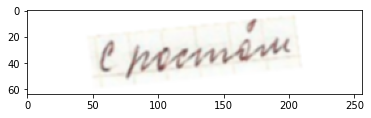

In [6]:
plt.imshow(examples[0][0][0].permute(1,2,0).numpy())
print(''.join([ alphabet[ch] for ch in examples[0][1].transpose(0,1)[0]]))

приводя   


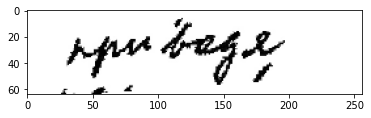

In [7]:
plt.imshow(examples[1][0][0].permute(1,2,0).numpy())
print(''.join([ alphabet[ch] for ch in examples[1][1].transpose(0,1)[0]]))

вика.   


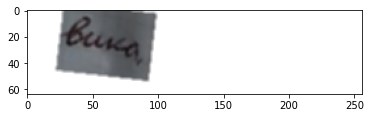

In [8]:
plt.imshow(examples[9][0][0].permute(1,2,0).numpy())
print(''.join([ alphabet[ch] for ch in examples[9][1].transpose(0,1)[0]]))

# MODEL 1: CRRN LSTM CTC LOSS

In [6]:
model1 = model_crnn_lstm.CRNN(dropout=0.1)
if torch.cuda.is_available():
  model1.cuda()
criterion = torch.nn.CTCLoss()
optimizer = torch.optim.SGD(model1.parameters(),lr=0.08)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [7]:
PATH_TO_SAVE_MODEL = '/content/model.pt'
train(model1, criterion, optimizer, train_loader, epochs=100)

100%|██████████| 7894/7894 [21:54<00:00,  6.01it/s]


model has been saved
--epoch 1--
 train cost: 0.9648075699806213
nan_number= 0
---


100%|██████████| 7894/7894 [21:40<00:00,  6.07it/s]


model has been saved
--epoch 2--
 train cost: 0.9403474926948547
nan_number= 0
---


100%|██████████| 7894/7894 [21:31<00:00,  6.11it/s]


model has been saved
--epoch 3--
 train cost: 0.9253377318382263
nan_number= 0
---


100%|██████████| 7894/7894 [21:31<00:00,  6.11it/s]


model has been saved
--epoch 4--
 train cost: 0.9056991338729858
nan_number= 0
---


 61%|██████    | 4826/7894 [13:09<08:22,  6.11it/s]


KeyboardInterrupt: ignored

# MODEL 2: RESNET LSTM CTC LOSS

In [9]:
model2 = model_resnet_lstm.ResNetRNN(dropout=0.1)
if torch.cuda.is_available():
  model2.cuda()
criterion = torch.nn.CTCLoss()
optimizer = torch.optim.SGD(model2.parameters(),lr=0.08)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [10]:
PATH_TO_SAVE_MODEL = '/content/model.pt'
train(model2, criterion, optimizer, train_loader, epochs=100)

100%|██████████| 7894/7894 [14:35<00:00,  9.01it/s]


model has been saved
--epoch 1--
 train cost: 0.9302303791046143
nan_number= 0
---


100%|██████████| 7894/7894 [14:42<00:00,  8.95it/s]


model has been saved
--epoch 2--
 train cost: 0.8283618688583374
nan_number= 0
---


100%|██████████| 7894/7894 [14:44<00:00,  8.93it/s]


model has been saved
--epoch 3--
 train cost: 0.7150055766105652
nan_number= 0
---


 34%|███▍      | 2708/7894 [05:03<09:41,  8.92it/s]


KeyboardInterrupt: ignored